In [2]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns


In [3]:
# Read CSV file
complete_data = pd.read_csv('HR-Employee-Attrition.csv', low_memory=False)
complete_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Check for data types
complete_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
# Check for the number of the values (to see if we have missing value)
complete_data.count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

In [6]:
# Dropping unwanted columns
cleaned_data = complete_data.drop(columns=['BusinessTravel', 'EmployeeCount', 'DistanceFromHome',
                                             'Attrition','Over18', 'StockOptionLevel', 'StandardHours'])
# Assign EmployeeNumber as an index


cleaned_data.head()

,Age,DailyRate,Department,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,Sales,2,Life Sciences,1,2,Female,94,3,...,11,3,1,8,0,1,6,4,0,5
1,49,279,Research & Development,1,Life Sciences,2,3,Male,61,2,...,23,4,4,10,3,3,10,7,1,7
2,37,1373,Research & Development,2,Other,4,4,Male,92,2,...,15,3,2,7,3,3,0,0,0,0
3,33,1392,Research & Development,4,Life Sciences,5,4,Female,56,3,...,11,3,3,8,3,3,8,7,3,0
4,27,591,Research & Development,1,Medical,7,1,Male,40,3,...,12,3,4,6,3,3,2,2,2,2


In [7]:
# selecting numeric columns to crate a summary statistic table
numeric_cols = cleaned_data.select_dtypes(include=['number']).columns
# Getting the mean, median, var, std, sem for each column
summary_table = cleaned_data[numeric_cols].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_table

,Age,DailyRate,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
mean,36.923810,802.485714,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6.502931e+03,...,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
median,36.000000,802.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4.919000e+03,...,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
var,83.455049,162819.593737,1.048914,362433.299749,1.194829,413.285626,0.506319,1.225316,1.216270,2.216486e+07,...,13.395144,0.130194,1.169013,60.540563,1.662219,0.499108,37.534310,13.127122,10.384057,12.731595
std,9.135373,403.509100,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4.707957e+03,...,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
sem,0.238269,10.524335,0.026712,15.702015,0.028510,0.530233,0.018559,0.028871,0.028764,1.227931e+02,...,0.095459,0.009411,0.028200,0.202939,0.033627,0.018426,0.159792,0.094499,0.084048,0.093064


In [8]:
# Check the values of Department column
cleaned_data['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [9]:
# Check the value for MaritalStatus column
cleaned_data['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [10]:
# Check the value for EducationField column
cleaned_data['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [11]:
cleaned_data[['Department', 'EducationField', 'Gender', 'Age', 'DailyRate', 'EnvironmentSatisfaction',
               'JobSatisfaction', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
              'WorkLifeBalance', 'YearsAtCompany']]

,Department,EducationField,Gender,Age,DailyRate,EnvironmentSatisfaction,JobSatisfaction,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,YearsAtCompany
0,Sales,Life Sciences,Female,41,1102,2,4,Yes,3,1,1,6
1,Research & Development,Life Sciences,Male,49,279,3,2,No,4,4,3,10
2,Research & Development,Other,Male,37,1373,4,3,Yes,3,2,3,0
3,Research & Development,Life Sciences,Female,33,1392,4,3,Yes,3,3,3,8
4,Research & Development,Medical,Male,27,591,1,2,No,3,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,Research & Development,Medical,Male,36,884,3,4,No,3,3,3,5
1466,Research & Development,Medical,Male,39,613,4,1,No,3,1,3,7
1467,Research & Development,Life Sciences,Male,27,155,2,2,Yes,4,2,3,6
1468,Sales,Medical,Male,49,1023,4,2,No,3,4,2,9


Does working overtime affect employees' performance ratings? 

In [105]:
# Total number of employees who works full time in a bar chart
overtime = pd.DataFrame(cleaned_data['OverTime']).value_counts()
overtime

OverTime
No          1054
Yes          416
Name: count, dtype: int64

<Axes: xlabel='Department', ylabel='Number of employees'>

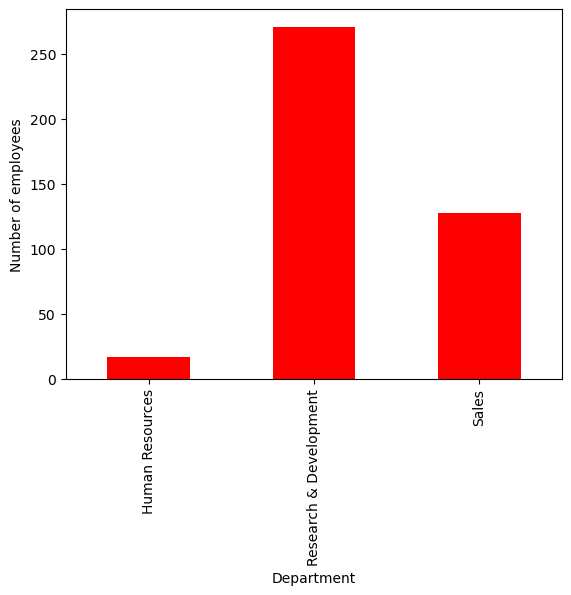

In [106]:
# Number of employees who works over time by department
# filtering the data for employees who worked overtyime
overtime_employee = cleaned_data[cleaned_data['OverTime'] == 'Yes']

# Filter the data for only number of employees who work overtime in each departments
department_overtime = overtime_employee.groupby('Department').size()

# Plot the data
department_overtime.plot(kind='bar', color='red', ylabel='Number of employees')

<Figure size 1000x600 with 0 Axes>

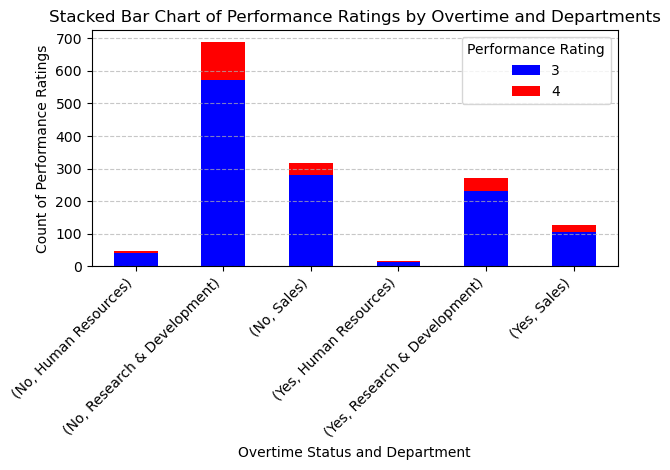

In [104]:
# Get the performance Rating by each Department and Overtime
performance_department = cleaned_data.groupby(['OverTime', 'Department'])['PerformanceRating'].value_counts().unstack(fill_value=0)

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
performance_department.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Stacked Bar Chart of Performance Ratings by Overtime and Departments')
plt.xlabel('Overtime Status and Department')
plt.ylabel('Count of Performance Ratings')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Performance Rating', loc='best')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<Axes: xlabel='Age', ylabel='Number of Employees'>

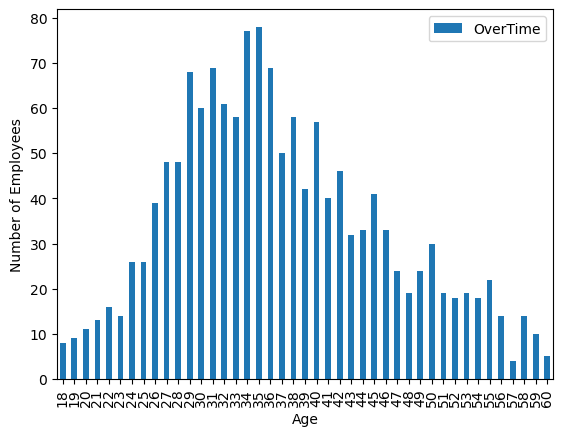

In [125]:
# Group the number of employees who worked overtime by age 
overtime_age = cleaned_data.groupby('Age')['OverTime'].size()
overtime_age.plot(kind='bar', legend='best', ylabel='Number of Employees')

Text(0.5, 1.0, 'Overtime employees between age 26 & 50')

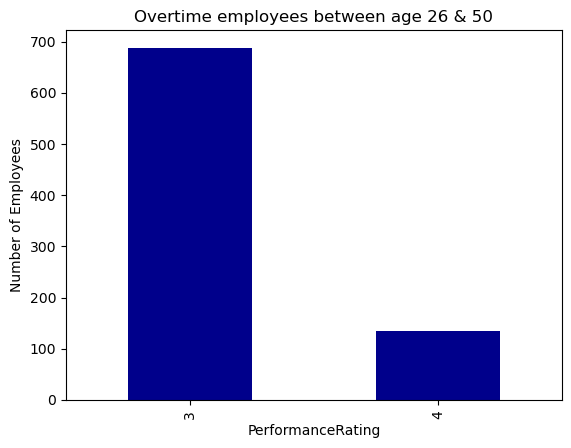

In [134]:
# Filter the age between 26 and 50 (the most age group worked overtime) and grouped them with Performance Rating
age = cleaned_data.loc[(cleaned_data['Age'] >= 26) & (cleaned_data['Age']) <= 50 & (cleaned_data['OverTime'] == 'Yes')]
overtime_age_perf = age.groupby('PerformanceRating').size()

# Plot the result into a bar chart
overtime_age_perf.plot(kind='bar', color='darkblue', ylabel='Number of Employees')
plt.title('Overtime employees between age 26 & 50')